# Create wind speed and direction variables

In [1]:
import numpy as np

N = 500
ws = np.random.random(N) * 6
wd = np.random.random(N) * 360

In [2]:
import pandas as pd

df = pd.DataFrame({"speed": ws, "direction": wd})
df

,speed,direction
0,4.692341,114.762311
1,3.084956,134.728678
2,2.587337,326.988291
3,5.451497,310.752980
4,3.695509,282.445791
...,...,...
495,0.691094,111.789630
496,1.369622,88.205298
497,3.085319,133.190632
498,1.329001,305.285367


# A basic scatter plot with transparency (alpha)

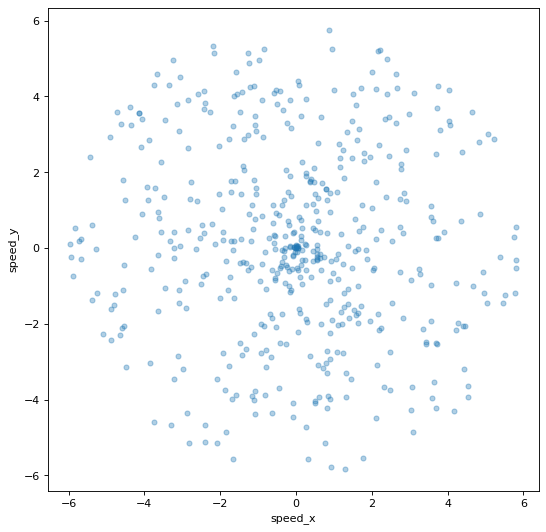

In [3]:
from matplotlib import pyplot as plt

df["speed_x"] = df["speed"] * np.sin(df["direction"] * np.pi / 180.0)
df["speed_y"] = df["speed"] * np.cos(df["direction"] * np.pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect("equal")
_ = df.plot(kind="scatter", x="speed_x", y="speed_y", alpha=0.35, ax=ax)

# windrose like a stacked histogram with normed (displayed in percent) results

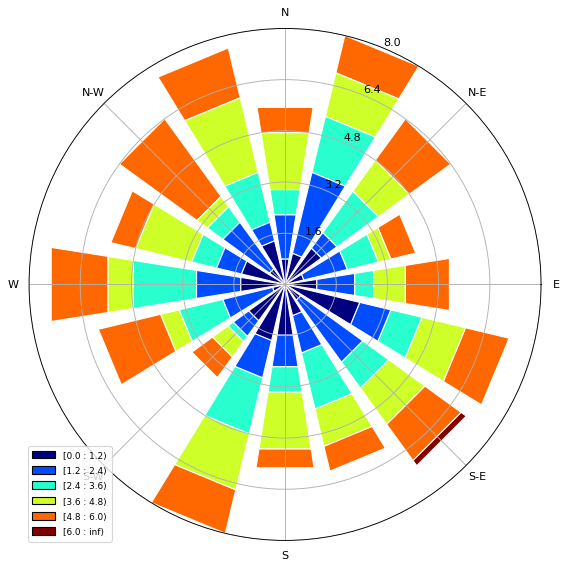

In [4]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.speed, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Another stacked histogram representation, not normed, with bins limits

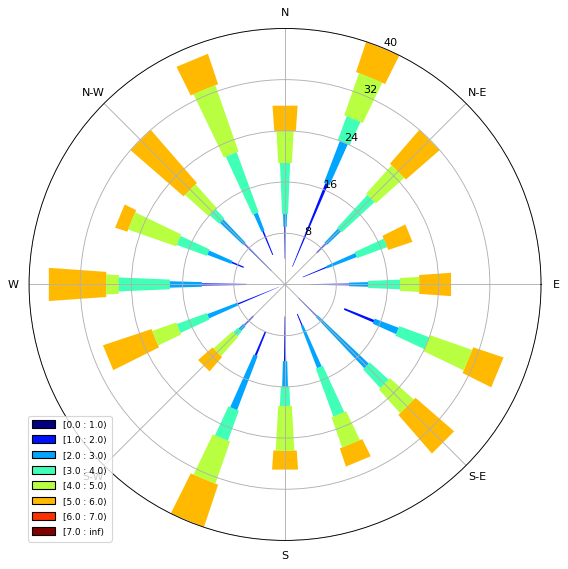

In [5]:
ax = WindroseAxes.from_ax()
ax.box(df.direction, df.speed, bins=np.arange(0, 8, 1))
ax.set_legend()

# A windrose in filled representation, with a controlled colormap

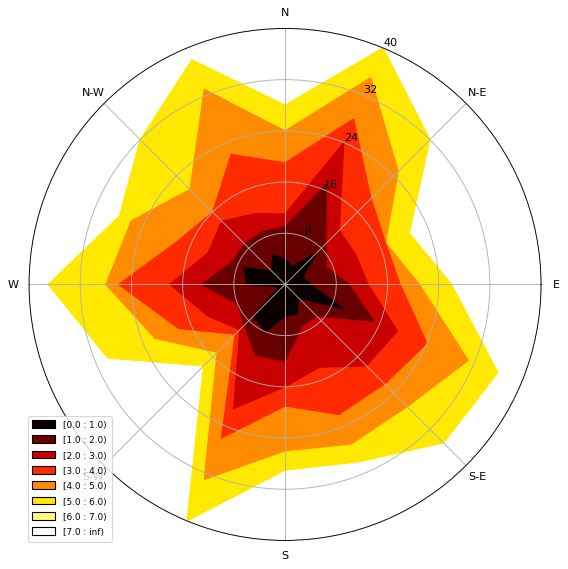

In [6]:
import matplotlib.cm as cm

ax = WindroseAxes.from_ax()
ax.contourf(df.direction, df.speed, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()

# Same as above, but with contours over each filled region...

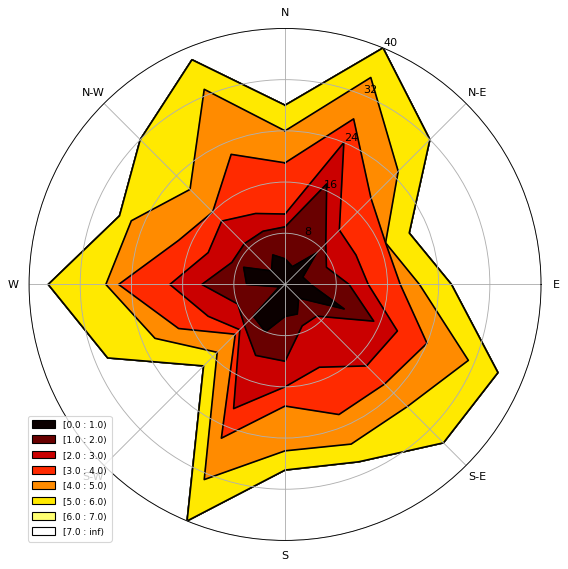

In [7]:
ax = WindroseAxes.from_ax()
ax.contourf(df.direction, df.speed, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(df.direction, df.speed, bins=np.arange(0, 8, 1), colors="black")
ax.set_legend()

# ...or without filled regions

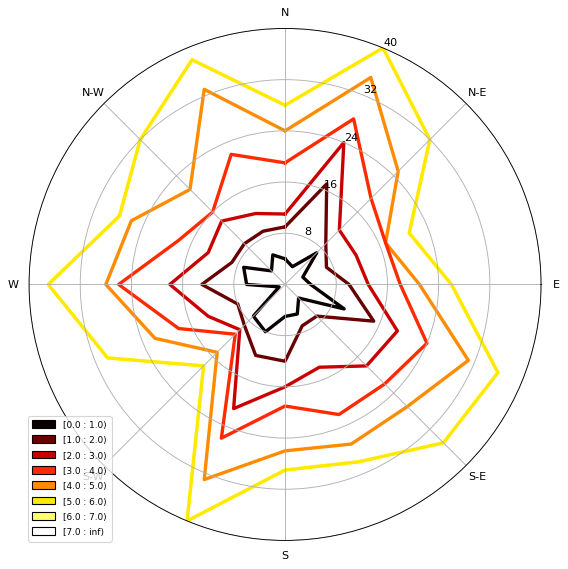

In [8]:
ax = WindroseAxes.from_ax()
ax.contour(df.direction, df.speed, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend()